This notebook is to document the testing of the implementation of GPP smoothing in FATES. 

In [1]:
%matplotlib inline
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import xarray as xr
from matplotlib import pyplot as plt
import datetime
import cartopy
import cartopy.crs as ccrs

Choose runs to use

In [2]:
runs = ['clm5-fates_napi5_test_case_3pft', 'clm5-fates_napi5_smoothing_case_3pft']

Choose years, variables, etc.

In [3]:
year = '2030'
month = '01'

Read in a year of data

In [4]:
drop={'ACTUAL_IMMOB','ATM_TOPO','BCDEP','BTRAN','CBALANCE_ERROR_BGC','CBALANCE_ERROR_ED','CBALANCE_ERROR_TOTAL',
      'CWD_STOCK_COL','C_LBLAYER','C_STOMATA','DENIT','DSL','DSTDEP','DSTFLXT','EFLXBUILD','EFLX_DYNBAL',
      'EFLX_GRND_LAKE','EFLX_LH_TOT','EFLX_LH_TOT_R','EFLXBUILD','EFLX_DYNBAL','EFLX_GRND_LAKE','EFLX_LH_TOT',
      'EFLX_LH_TOT_R','ERRH2O','ERRH2OSNO','ERRSEB','ERRSOI','FCEV','FCOV','FCTR','FFIX_TO_SMINN','FGEV','FGR',
      'FGR12','FH2OSFC','FIRA','FIRA_R','FIRE','FSA','FSAT','FSDS','FSDSND','FSDSNDLN','FSDSNI','FSDSVD','FSDSVDLN',
      'FSDSVI','FSDSVILN','FSH','FSH_PRECIP_CONVERSION','FSH_G','FSH_R','FSH_RUNOFF_ICE_TO_LIQ','FSH_TO_COUPLER',
      'FSH_V','FSM','FSNO','FSNO_EFF','FSR','FSRND','FSRNDLN','FSRNI','FSRVD','FSRVDLN','FSRVI','GROSS_NMIN','H2OCAN',
      'H2OSNO_TOP','HEAT_CONTENT1','HEAT_FROM_AC','HIA','HIA_R','HIA_U','HUMIDEX','HUMIDEX_R','HUMIDEX_U',
      'ICE_CONTENT1','LAKEICEFRAC_SURF','LAKEICETHICK','LIQUID_CONTENT1','LITR1N','LITR1N_vr','LITR2N','LITR2N_vr',
      'LITR3N','LITR3N_vr','NDEP_TO_SMINN','NET_NMIN','O_SCALAR','PARVEGLN','PBOT','PCT_GLC_MEC','POTENTIAL_IMMOB',
      'QCHARGE','QDRAI','QDRAI_PERCH','QDRAI_XS','QDRIP','QFLOOD','QFLOOD','QFLX_DEW_GRND','QFLX_DEW_SNOW',
      'QFLX_EVAP_TOT','QFLX_ICE_DYNBAL','QFLX_LIQ_DYNBAL','QFLX_SNOW_DRAIN','QFLX_SNOW_DRAIN_ICE','QFLX_SUB_SNOW',
      'QH2OSFC','QICE','QICE_FRZ','QICE_MELT','QINFL','QINTR','QIRRIG','QOVER','QRGWL','QRUNOFF','QRUNOFF_ICE',
      'QRUNOFF_TO_COUPLER','QSNOCPLIQ','QSNOFRZ','QSNOFRZ_ICE','QSNOMELT','QSNOMELT_ICE','QSNO_TEMPUNLOAD',
      'QSNO_WINDUNLOAD','QSNWCPICE', 'QSOIL_ICE','SABG_PEN','SABV','SMINN','SMINN_LEACHED','SMINN_TO_PLANT',
      'SNOBCMCL','SNOBCMSL','SNOCAN','SNODSTMCL','SNODSTMSL','SNOFSRND','SNOFSRND','SNOFSRVD','SNOFSRVI',
      'SNOINTABS','SNOOCMCL','SNOOCMSL','SNOTXMASS','SNOUNLOAD','SNOW_PERSISTENCE','SNOW_SINKS','SNOW_SOURCES',
      'SOIL1N','SOIL1N_vr','SOIL2N','SOIL2N_vr','SOIL3N','SOIL3N_vr','SOILC_HR','SOILICE','SOILLIQ','SOILRESIS',
      'SOILWATER_10CM','SOM_C_LEACHED','SUPPLEMENT_TO_SMINN','SWBGT','SWBGT_U','TAUX','TAUY','TKE1','TLAKE',
      'TREFMNAV','TREFMXAV','TSOI_ICE','T_SCALAR','U10','U10_DUST','URBAN_AC','URBAN_HEAT','VOLR','VOLRMCH',
      'WASTEHEAT','WBT','WBT_R','WBT_U','W_SCALAR','ZBOT','ZWT','ZWT_PERCH'}

In [5]:
run = runs[0]
scratch = '/glade/scratch/rfisher/'
arc = scratch + run + '/run/' + run + '.clm2.h0.' + year + '-' 
arc = scratch + '/archive/' + run + '/lnd/hist/' + run + '.clm2.h0.' + year + '-' 
#no_sm = xr.open_dataset(file)
no_sm = xr.open_mfdataset(arc + '*.nc', drop_variables=drop, decode_times=False)

In [6]:
run = runs[1]
arc = scratch + run + '/run/' + run + '.clm2.h0.' + year + '-' 
arc = scratch + '/archive/' + run + '/lnd/hist/' + run + '.clm2.h0.' + year + '-' 
sm = xr.open_mfdataset(arc + '*.nc', drop_variables=drop, decode_times=False)

Calculate deltas

In [7]:
#print(no_sm.GPP)
gppns = np.mean(no_sm.GPP,0)
gpps  = np.mean(sm.GPP,0)
gppns = gppns*24*3600*365
gpps  = gpps*24*3600*365

diff_sm     = np.divide(gppns,gpps)
print(diff_sm)

<xarray.DataArray 'GPP' (lat: 46, lon: 72)>
dask.array<shape=(46, 72), dtype=float32, chunksize=(46, 72)>
Coordinates:
  * lon      (lon) float32 0.0 5.0 10.0 15.0 20.0 ... 340.0 345.0 350.0 355.0
  * lat      (lat) float32 -90.0 -86.0 -82.0 -78.0 -74.0 ... 78.0 82.0 86.0 90.0


Plot differences

<xarray.DataArray 'GPP' (lat: 46, lon: 72)>
dask.array<shape=(46, 72), dtype=float32, chunksize=(46, 72)>
Coordinates:
  * lon      (lon) float32 0.0 5.0 10.0 15.0 20.0 ... 340.0 345.0 350.0 355.0
  * lat      (lat) float32 -90.0 -86.0 -82.0 -78.0 -74.0 ... 78.0 82.0 86.0 90.0
Attributes:
    units:    
    name:     


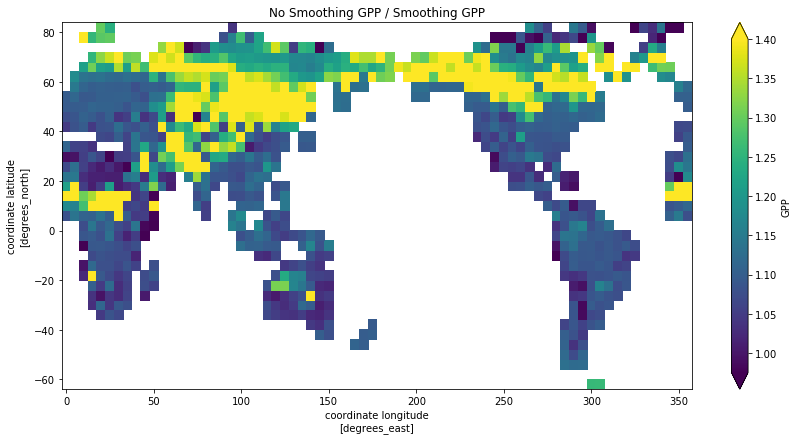

In [8]:
plt.rcParams['figure.figsize'] = [12, 6]
vm=1;vx=1.4
diff_sm.attrs['units'] = ''
diff_sm.attrs['name'] = ''
diff_sm[7:44,:].plot(robust=True,vmax=vx)
vx=4
plt.tight_layout()

plt.title('No Smoothing GPP / Smoothing GPP')

print(diff_sm)

Check PFTs

Plot Fluxes

Text(0.5, 1, 's 3PFT')

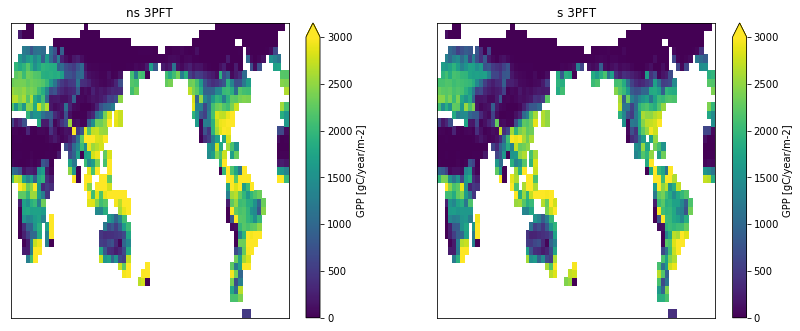

In [9]:
plt.rcParams['figure.figsize'] = [12, 5]
fig,([ax0, ax1]) = plt.subplots(ncols=2, nrows=1)
vm=0;vx=3000
gppns.attrs['units'] = 'gC/year/m-2'
gpps.attrs['units'] = 'gC/year/m-2'
gppns[7:44,:].plot (ax=ax0,vmin=vm,vmax=vx)
gpps[7:44,:].plot      (ax=ax1,vmin=vm,vmax=vx)
plt.tight_layout()
ax0.axes.get_xaxis().set_visible(False)
ax1.axes.get_xaxis().set_visible(False)
ax0.axes.get_yaxis().set_visible(False)
ax1.axes.get_yaxis().set_visible(False)

ax0.set_title('ns 3PFT')
ax1.set_title('s 3PFT')


Text(0.5, 1, 's 3PFT')

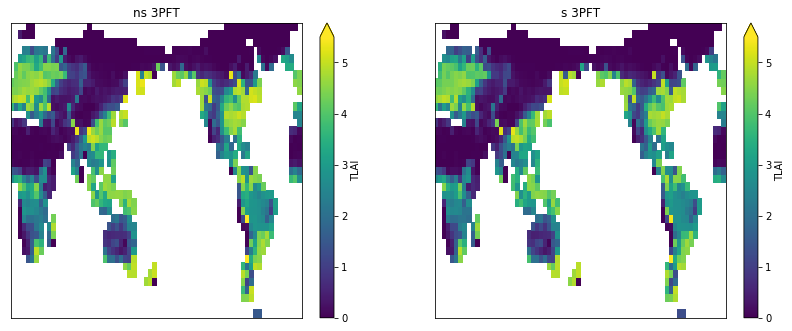

In [10]:
plt.rcParams['figure.figsize'] = [12, 5]
fig,([ax0, ax1]) = plt.subplots(ncols=2, nrows=1)
vm=0;vx=5.5
np.mean(no_sm.TLAI,0)[7:44,:].plot (ax=ax0,vmin=vm,vmax=vx)
np.mean(sm.TLAI,0)[7:44,:].plot      (ax=ax1,vmin=vm,vmax=vx)
plt.tight_layout()
ax0.axes.get_xaxis().set_visible(False)
ax1.axes.get_xaxis().set_visible(False)
ax0.axes.get_yaxis().set_visible(False)
ax1.axes.get_yaxis().set_visible(False)

ax0.set_title('ns 3PFT')
ax1.set_title('s 3PFT')

Text(0.5, 1, 'CUE: smoothing')

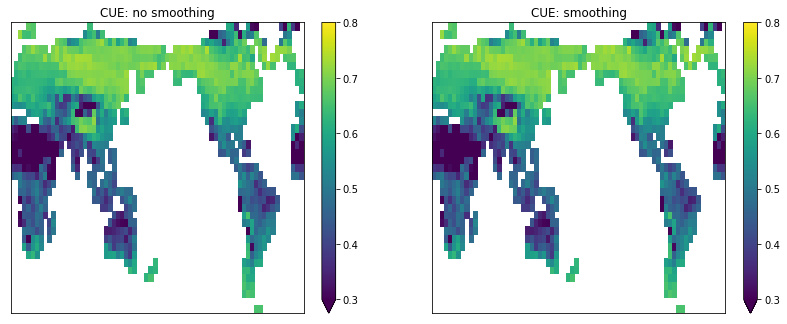

In [11]:
plt.rcParams['figure.figsize'] = [12, 5]
fig,([ax0, ax1]) = plt.subplots(ncols=2, nrows=1)
vm=0.3;vx=0.8
cuens = np.divide(np.mean(no_sm.NPP,0),np.mean(no_sm.GPP,0))
cue_s = np.divide(np.mean(no_sm.NPP,0),np.mean(no_sm.GPP,0))

cuens[7:44,:].plot(ax=ax0,vmin=vm,vmax=vx)
cue_s[7:44,:].plot(ax=ax1,vmin=vm,vmax=vx)

plt.tight_layout()
ax0.axes.get_xaxis().set_visible(False)
ax1.axes.get_xaxis().set_visible(False)
ax0.axes.get_yaxis().set_visible(False)
ax1.axes.get_yaxis().set_visible(False)

ax0.set_title('CUE: no smoothing')
ax1.set_title('CUE: smoothing')



check spinup status

In [12]:
run = runs[0]
arc = scratch+ run + '/run/' + run + '.clm2.h0.'
#arc = scratch + 'archive/' + run + '/lnd/hist/' + run + '.clm2.h0.' 
print(arc)
ds8 = xr.open_mfdataset(arc + '20**-*.nc', drop_variables=drop, decode_times=False)


/glade/scratch/rfisher/clm5-fates_napi5_test_case_3pft/run/clm5-fates_napi5_test_case_3pft.clm2.h0.


In [13]:
#ds8.TLAI.plot(x='lon', y='lat', col='time', levels=8,col_wrap=3, robust=True, vmax=5)

Text(0.5, 1.0, '')

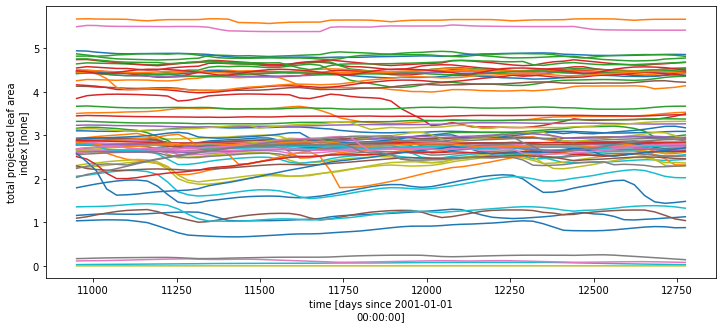

In [14]:
lats = [10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32]
lons = [56, 57, 58, 60, 61, 62 ,63,64,65,66,67,68]
#ds8.TLAI.attrs['long_name'] = 'LAI'
ds8.TLAI.isel(lat=lats[4],  lon=lons[1:10]).plot.line(x='time',  add_legend=False)
ds8.TLAI.isel(lat=lats[5],  lon=lons[1:10]).plot.line(x='time',  add_legend=False)
ds8.TLAI.isel(lat=lats[6],  lon=lons[1:10]).plot.line(x='time',  add_legend=False)
ds8.TLAI.isel(lat=lats[7],  lon=lons[1:10]).plot.line(x='time',  add_legend=False)
ds8.TLAI.isel(lat=lats[8],  lon=lons[1:10]).plot.line(x='time',  add_legend=False)
ds8.TLAI.isel(lat=lats[9],  lon=lons[1:10]).plot.line(x='time',  add_legend=False)
ds8.TLAI.isel(lat=lats[10], lon=lons[1:10]).plot.line(x='time',  add_legend=False)
ds8.TLAI.isel(lat=lats[11], lon=lons[1:10]).plot.line(x='time',  add_legend=False)
ds8.TLAI.isel(lat=lats[12], lon=lons[1:10]).plot.line(x='time',  add_legend=False)
ds8.TLAI.isel(lat=lats[13], lon=lons[1:10]).plot.line(x='time',  add_legend=False)
ds8.TLAI.isel(lat=lats[14], lon=lons[1:10]).plot.line(x='time',  add_legend=False)
ds8.TLAI.isel(lat=lats[15], lon=lons[1:10]).plot.line(x='time',  add_legend=False)
ds8.TLAI.isel(lat=lats[16], lon=lons[1:10]).plot.line(x='time',  add_legend=False)
ds8.TLAI.isel(lat=lats[17], lon=lons[1:10]).plot.line(x='time',  add_legend=False)
ds8.TLAI.isel(lat=lats[18], lon=lons[1:10]).plot.line(x='time',  add_legend=False)
ds8.TLAI.isel(lat=lats[19], lon=lons[1:10]).plot.line(x='time',  add_legend=False)
ds8.TLAI.isel(lat=lats[20], lon=lons[1:10]).plot.line(x='time',  add_legend=False)
ds8.TLAI.isel(lat=lats[21], lon=lons[1:10]).plot.line(x='time',  add_legend=False)
ds8.TLAI.isel(lat=lats[22], lon=lons[1:10]).plot.line(x='time',  add_legend=False)
plt.title('')

Text(0.5, 1.0, '')

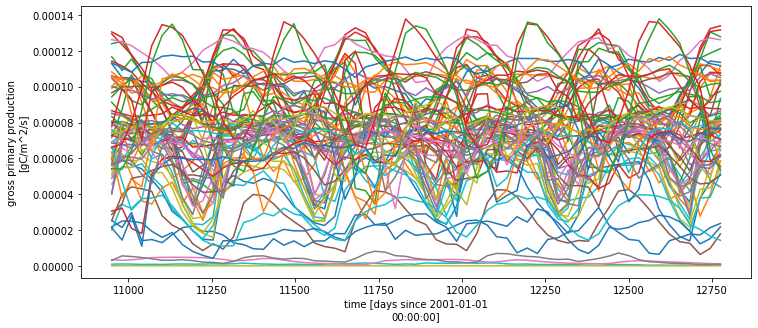

In [15]:
lats = [10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32]
lons = [56, 57, 58, 60, 61, 62 ,63,64,65,66,67,68]
#ds8.GPP.attrs['long_name'] = 'GPP'
#ds8.GPP=ds8.GPP*24*3600
ds8.GPP.isel(lat=lats[4],  lon=lons[1:10]).plot.line(x='time',  add_legend=False)
ds8.GPP.isel(lat=lats[5],  lon=lons[1:10]).plot.line(x='time',  add_legend=False)
ds8.GPP.isel(lat=lats[6],  lon=lons[1:10]).plot.line(x='time',  add_legend=False)
ds8.GPP.isel(lat=lats[7],  lon=lons[1:10]).plot.line(x='time',  add_legend=False)
ds8.GPP.isel(lat=lats[8],  lon=lons[1:10]).plot.line(x='time',  add_legend=False)
ds8.GPP.isel(lat=lats[9],  lon=lons[1:10]).plot.line(x='time',  add_legend=False)
ds8.GPP.isel(lat=lats[10], lon=lons[1:10]).plot.line(x='time',  add_legend=False)
ds8.GPP.isel(lat=lats[11], lon=lons[1:10]).plot.line(x='time',  add_legend=False)
ds8.GPP.isel(lat=lats[12], lon=lons[1:10]).plot.line(x='time',  add_legend=False)
ds8.GPP.isel(lat=lats[13], lon=lons[1:10]).plot.line(x='time',  add_legend=False)
ds8.GPP.isel(lat=lats[14], lon=lons[1:10]).plot.line(x='time',  add_legend=False)
ds8.GPP.isel(lat=lats[15], lon=lons[1:10]).plot.line(x='time',  add_legend=False)
ds8.GPP.isel(lat=lats[16], lon=lons[1:10]).plot.line(x='time',  add_legend=False)
ds8.GPP.isel(lat=lats[17], lon=lons[1:10]).plot.line(x='time',  add_legend=False)
ds8.GPP.isel(lat=lats[18], lon=lons[1:10]).plot.line(x='time',  add_legend=False)
ds8.GPP.isel(lat=lats[19], lon=lons[1:10]).plot.line(x='time',  add_legend=False)
ds8.GPP.isel(lat=lats[20], lon=lons[1:10]).plot.line(x='time',  add_legend=False)
ds8.GPP.isel(lat=lats[21], lon=lons[1:10]).plot.line(x='time',  add_legend=False)
ds8.GPP.isel(lat=lats[22], lon=lons[1:10]).plot.line(x='time',  add_legend=False)
plt.title('')

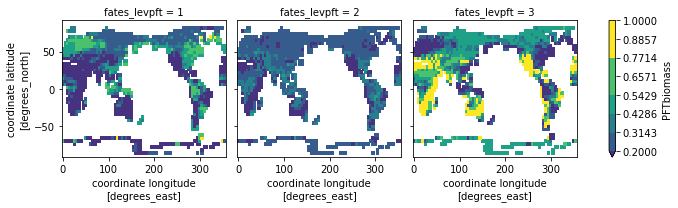

In [24]:
plt.rcParams['figure.figsize'] = [15, 15]
PFTbiomass = no_sm.PFTbiomass[0,0:3,:,:]
sumB=np.sum(PFTbiomass,0)
normB = PFTbiomass/sumB
plot = normB.plot(x='lon', y='lat', col='fates_levpft', col_wrap=3, levels=8, vmin=0.2 , vmax = 1.0)
#plt.tight_layout()

60


Text(0.5, 1.0, 'change in LAI in last year')

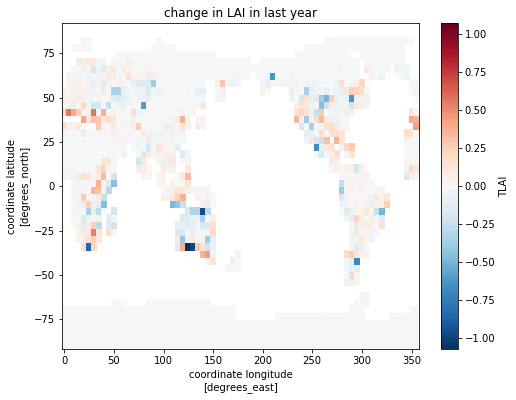

In [27]:
plt.rcParams['figure.figsize'] = [8, 6]
s=ds8.TLAI.sizes['time']-1
d= ds8.TLAI.isel(time=s)-ds8.TLAI.isel(time=s-12)
#ds8.TLAI.isel(time=27).plot(x='lon', y='lat')
print(s)
d.plot()
plt.title('change in LAI in last year')

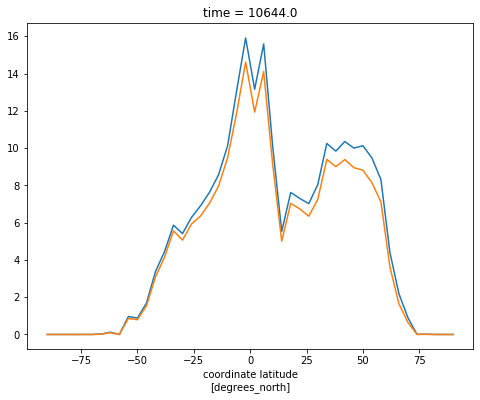

In [18]:
a = no_sm.area
a = a.isel(time=1)
t=10**15 #gC in a igatonne
u=(1000*1000) #change from km2 to m2

#Change to gC/day/km2
GPP_gC_day_km = np.multiply(gppns,u)
#Change to gC/day/gridcell
GPP_gC_day_gridcell = np.multiply(GPP_gC_day_km,a)
#Change to gC/year/gridcell
GPP_gC_year_gridcell = np.multiply(GPP_gC_day_gridcell,365)
#Change to tC/year/gridcell
GPP_gtC_year_gridcell = np.divide(GPP_gC_day_gridcell,t)
sum1=np.sum(GPP_gtC_year_gridcell,1)
sum2ns=np.sum(sum1,0)
sum1.plot()
#Change to gC/day/km2
GPP_gC_day_km = np.multiply(gpps,u)
#Change to gC/day/gridcell
GPP_gC_day_gridcell = np.multiply(GPP_gC_day_km,a)
#Change to gC/year/gridcell
GPP_gC_year_gridcell = np.multiply(GPP_gC_day_gridcell,365)
#Change to tC/year/gridcell
GPP_gtC_year_gridcell = np.divide(GPP_gC_day_gridcell,t)
sum1=np.sum(GPP_gtC_year_gridcell,1)
sum2s=np.sum(sum1,0)

sum1.plot()
s1=sum2ns/sum2s 



Text(0.5, 1.0, 'Smoothing effect vs temperature')

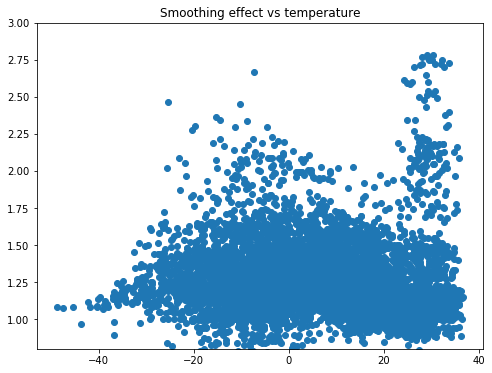

In [35]:
plt.scatter(no_sm.TV-273.1,no_sm.GPP/sm.GPP)
plt.ylim(0.8,3.0)
plt.title('Smoothing effect vs temperature')

Text(0.5, 1.0, 'Smoothing effect vs LAI')

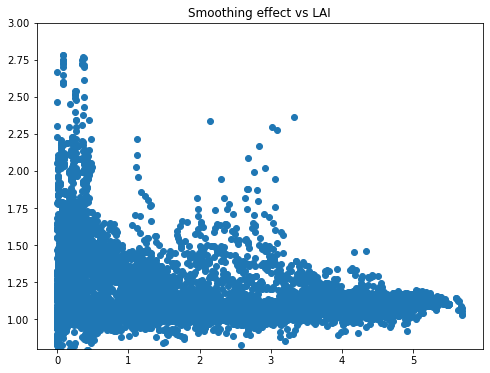

In [29]:
plt.scatter(no_sm.TLAI,no_sm.GPP/sm.GPP)
plt.ylim(0.8,3)
plt.title('Smoothing effect vs LAI')

Text(0.5, 1.0, 'Smoothing effect vs BTRAN')

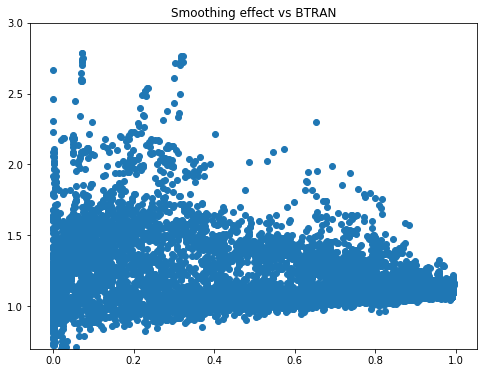

In [31]:
plt.scatter(no_sm.BTRANMN,no_sm.GPP/sm.GPP)
plt.ylim(0.7,3.0)
plt.title('Smoothing effect vs BTRAN')

Text(0.5, 1.0, 'Smoothing effect vs GPP')

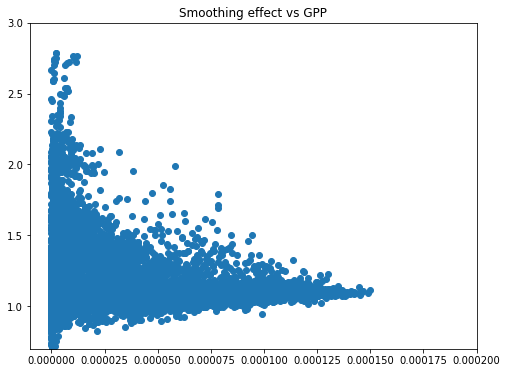

In [22]:
plt.scatter(no_sm.GPP,no_sm.GPP/sm.GPP)
plt.ylim(0.7,3)
plt.xlim(-0.00001,0.00020)
plt.title('Smoothing effect vs GPP')

<xarray.Dataset>
Dimensions:                          (fates_levage: 7, fates_levagepft: 21, fates_levcan: 2, fates_levcnlf: 60, fates_levcnlfpf: 180, fates_levcwdsc: 4, fates_levelage: 7, fates_levelcwd: 4, fates_levelem: 1, fates_levelpft: 3, fates_levfuel: 6, fates_levheight: 6, fates_levpft: 3, fates_levscag: 91, fates_levscagpf: 273, fates_levscls: 13, fates_levscpf: 39, hist_interval: 2, lat: 46, levdcmp: 25, levgrnd: 25, levlak: 10, levsoi: 20, lon: 72, ltype: 9, time: 12)
Coordinates:
  * levgrnd                          (levgrnd) float32 0.01 0.04 ... 41.998436
  * levlak                           (levlak) float32 0.05 0.6 ... 34.325 44.775
  * levdcmp                          (levdcmp) float32 0.01 0.04 ... 41.998436
  * fates_levscls                    (fates_levscls) float32 0.0 5.0 ... 100.0
  * fates_levage                     (fates_levage) float32 0.0 1.0 ... 50.0
  * fates_levheight                  (fates_levheight) float32 0.0 0.1 ... 10.0
  * fates_levpft           